In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_csv("./Raemian_final.csv")

In [3]:
data

,계약년월,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,202101,2020,강남구,"10,589,107","6,436,523",97.0,"5,762","3,550","25,979.03","22,748.79",...,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10848.092020
1,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10951.256930
2,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11919.915870
3,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10951.256930
4,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11919.915870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,202011,2011,중구,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45","22,428.73",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5754.974222
7858,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5644.301640
7859,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5865.646803
7860,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4979.302424


In [4]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


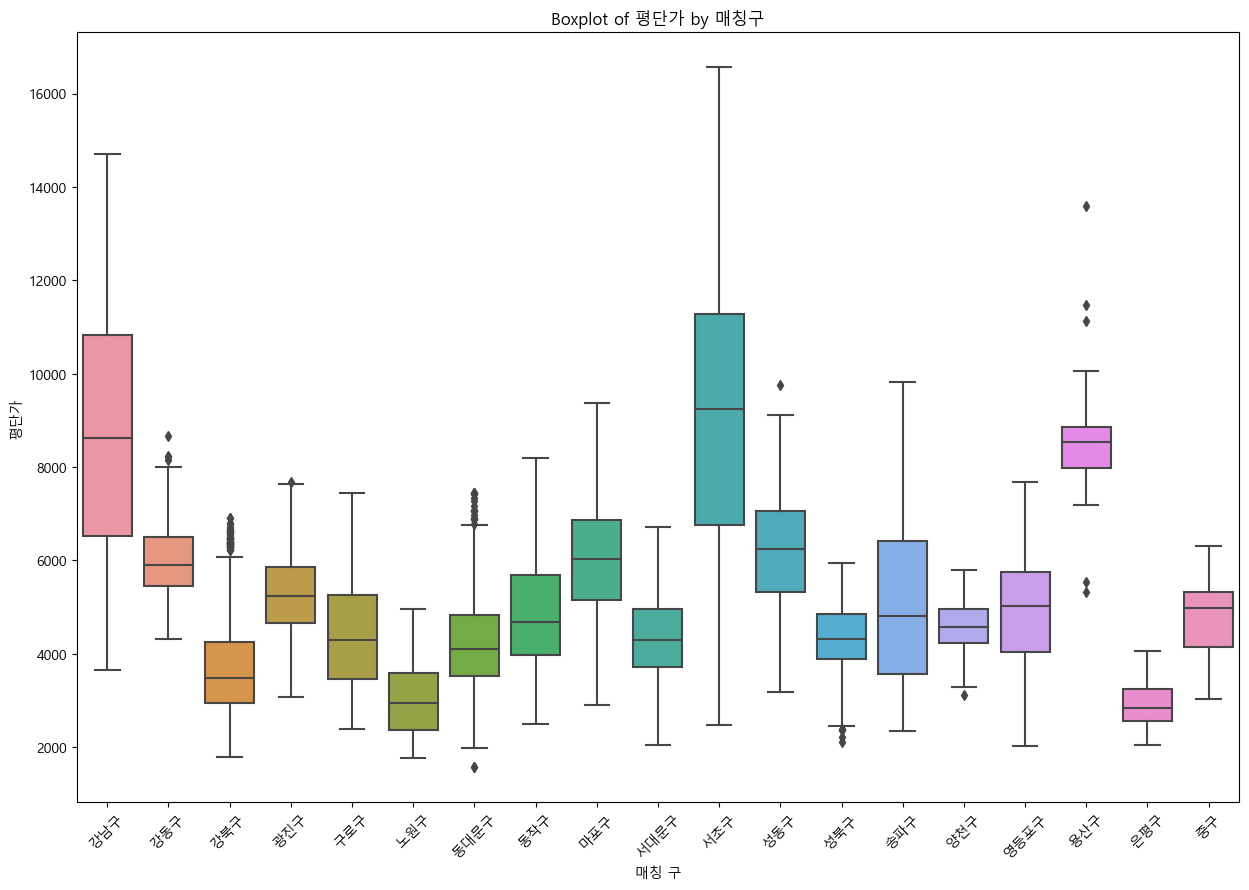

매칭 구
강남구     8658.884812
강동구     6005.889577
강북구     3562.062570
광진구     5321.716923
구로구     4447.467519
노원구     3033.473084
동대문구    4204.077337
동작구     4891.771727
마포구     6005.732855
서대문구    4362.182802
서초구     8818.127160
성동구     6215.645283
성북구     4341.260498
송파구     5047.007055
양천구     4611.659480
영등포구    4966.965490
용산구     8496.856822
은평구     2919.683366
중구      4784.354895
Name: 평당가, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6517.9074845000005
상위 25% :  10824.312422500001
강남구 평균 평당가:  8658.884812042275
강남구 전체 개수 : 686
강남구 필터링 개수 686
이상치 개수(제거) : 0


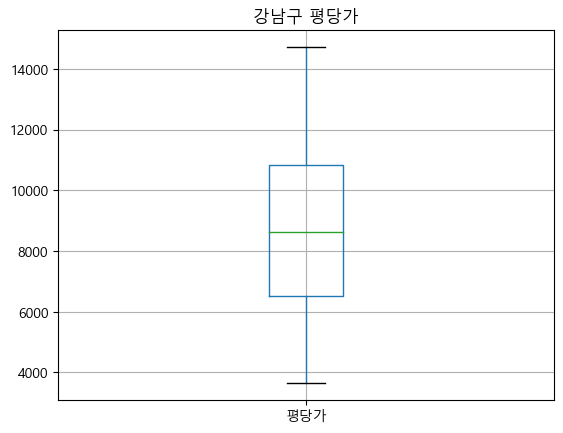

하위 25% :  5451.243816
상위 25% :  6507.864728500001
강동구 평균 평당가:  6029.2311774949485
강동구 전체 개수 : 396
강동구 필터링 개수 392
이상치 개수(제거) : 4


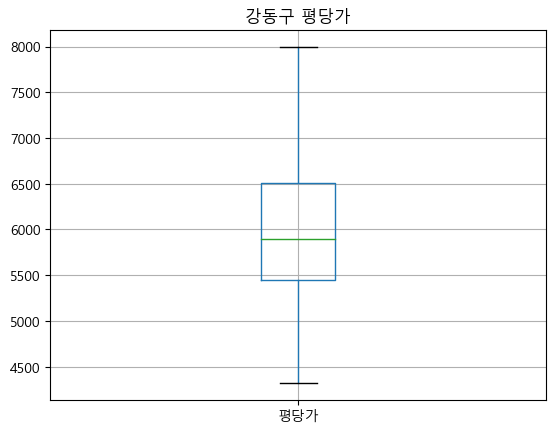

하위 25% :  2937.9562690000002
상위 25% :  4250.166274
강북구 평균 평당가:  3728.378659097205
강북구 전체 개수 : 823
강북구 필터링 개수 776
이상치 개수(제거) : 47


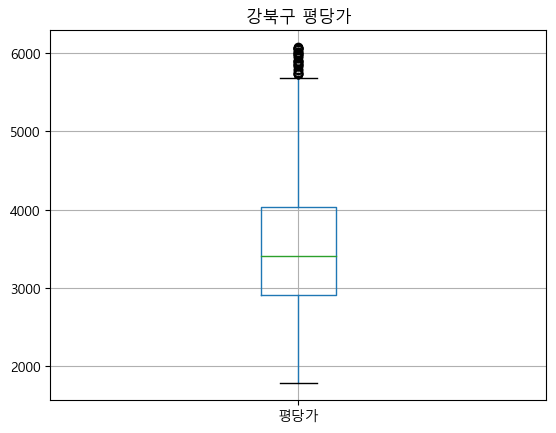

하위 25% :  4653.78122875
상위 25% :  5867.67188825
광진구 평균 평당가:  5329.067257124223
광진구 전체 개수 : 322
광진구 필터링 개수 321
이상치 개수(제거) : 1


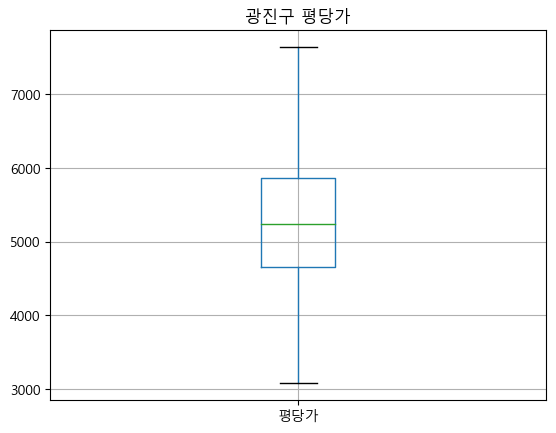

하위 25% :  3454.6198445
상위 25% :  5251.608025
구로구 평균 평당가:  4447.467518611571
구로구 전체 개수 : 242
구로구 필터링 개수 242
이상치 개수(제거) : 0


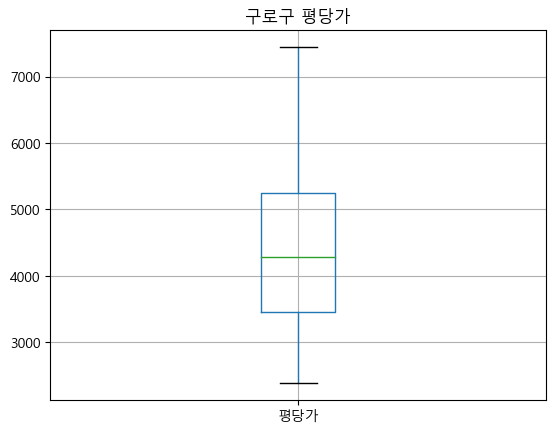

하위 25% :  2359.66291
상위 25% :  3586.9642519999998
노원구 평균 평당가:  3033.473083614815
노원구 전체 개수 : 135
노원구 필터링 개수 135
이상치 개수(제거) : 0


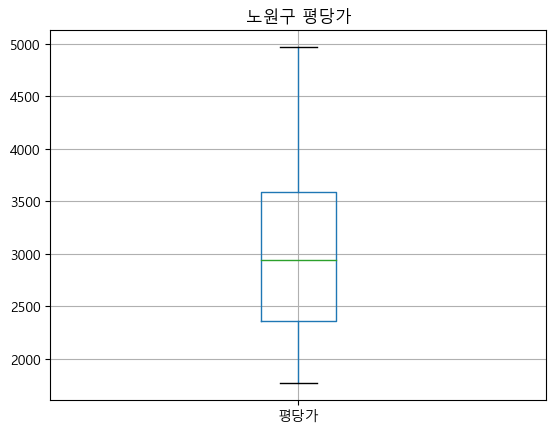

하위 25% :  3534.06896175
상위 25% :  4829.15047925
동대문구 평균 평당가:  4262.071241162195
동대문구 전체 개수 : 820
동대문구 필터링 개수 800
이상치 개수(제거) : 20


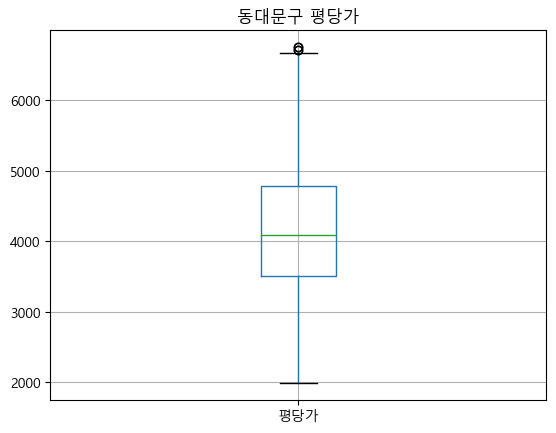

하위 25% :  3982.7589865
상위 25% :  5679.516827
동작구 평균 평당가:  4891.771726914081
동작구 전체 개수 : 419
동작구 필터링 개수 419
이상치 개수(제거) : 0


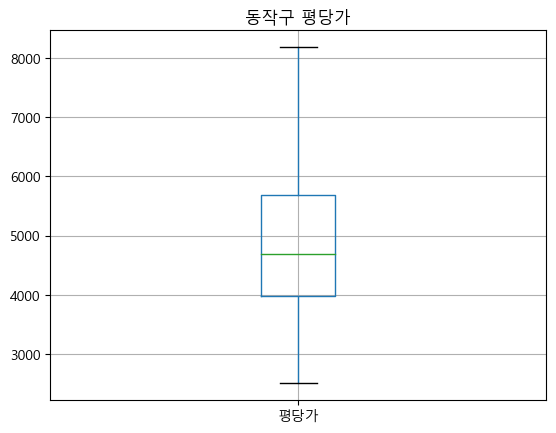

하위 25% :  5155.81715475
상위 25% :  6855.45165025
마포구 평균 평당가:  6005.732855147272
마포구 전체 개수 : 1100
마포구 필터링 개수 1100
이상치 개수(제거) : 0


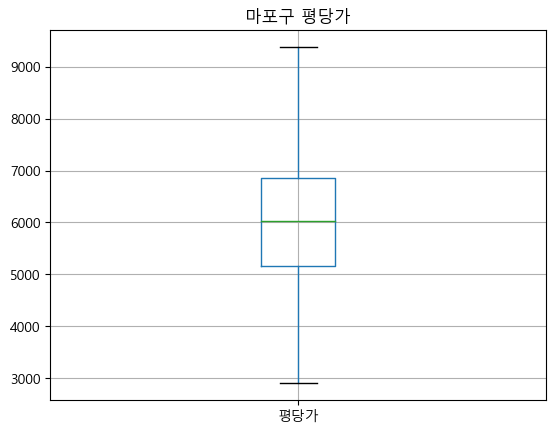

하위 25% :  3723.357667
상위 25% :  4966.6771555
서대문구 평균 평당가:  4362.1828021631945
서대문구 전체 개수 : 576
서대문구 필터링 개수 576
이상치 개수(제거) : 0


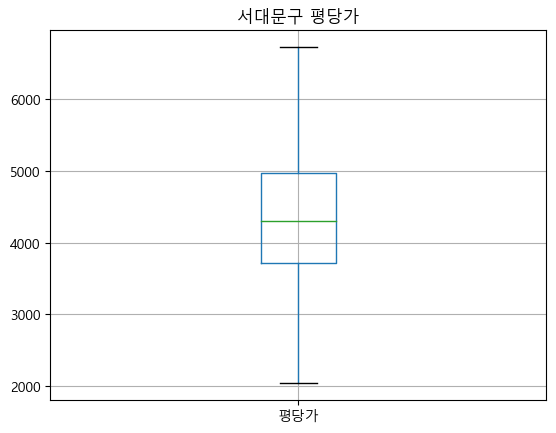

하위 25% :  6763.046088249999
상위 25% :  11268.528245
서초구 평균 평당가:  8818.127160437723
서초구 전체 개수 : 562
서초구 필터링 개수 562
이상치 개수(제거) : 0


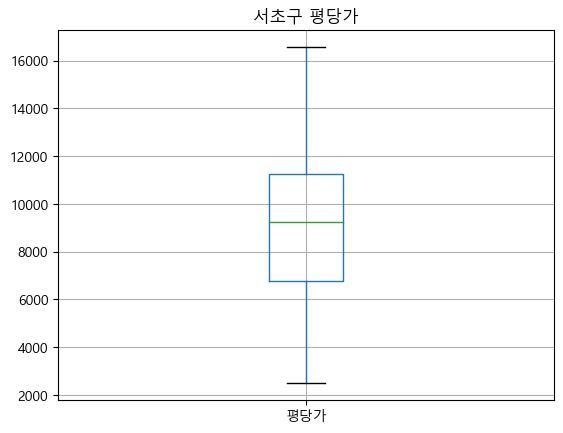

하위 25% :  5323.711545
상위 25% :  7053.527588
성동구 평균 평당가:  6231.140005266375
성동구 전체 개수 : 229
성동구 필터링 개수 228
이상치 개수(제거) : 1


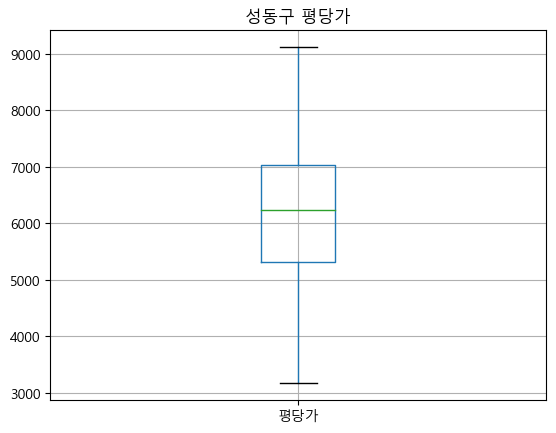

하위 25% :  3877.930971
상위 25% :  4855.775663
성북구 평균 평당가:  4327.045927135922
성북구 전체 개수 : 721
성북구 필터링 개수 716
이상치 개수(제거) : 5


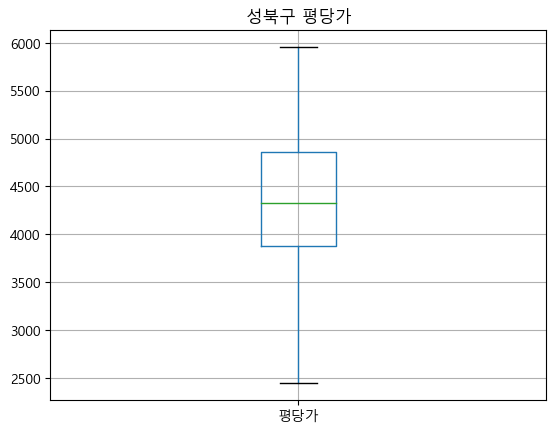

하위 25% :  3569.244888
상위 25% :  6425.211298
송파구 평균 평당가:  5047.007054873562
송파구 전체 개수 : 261
송파구 필터링 개수 261
이상치 개수(제거) : 0


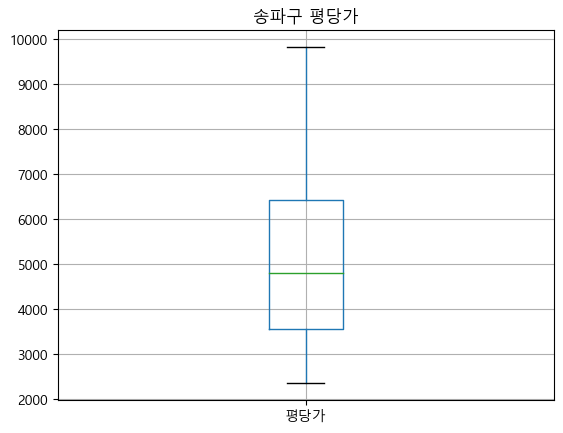

하위 25% :  4037.034244
상위 25% :  5761.21665375
영등포구 평균 평당가:  4966.965489997409
영등포구 전체 개수 : 386
영등포구 필터링 개수 386
이상치 개수(제거) : 0


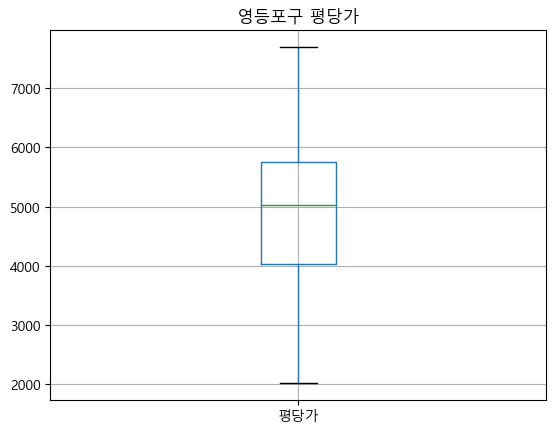

하위 25% :  7973.8279335
상위 25% :  8852.605214
용산구 평균 평당가:  8610.61287
용산구 전체 개수 : 40
용산구 필터링 개수 35
이상치 개수(제거) : 5


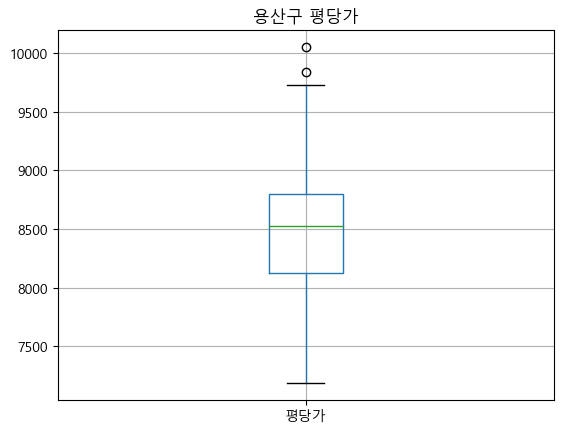

하위 25% :  2565.1517487499996
상위 25% :  3248.7062849999998
은평구 평균 평당가:  2919.683366342105
은평구 전체 개수 : 38
은평구 필터링 개수 38
이상치 개수(제거) : 0


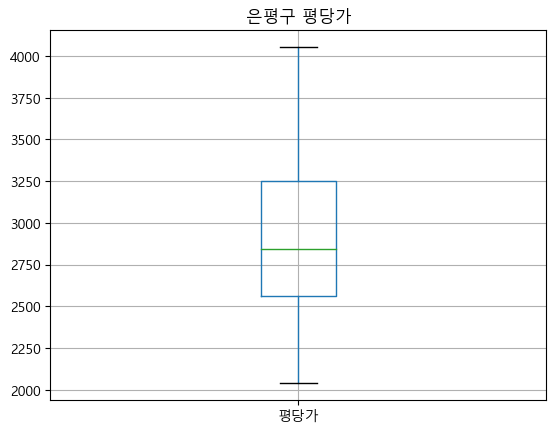

하위 25% :  4237.1909625
상위 25% :  4954.424555
양천구 평균 평당가:  4573.601845102566
양천구 전체 개수 : 39
양천구 필터링 개수 38
이상치 개수(제거) : 1


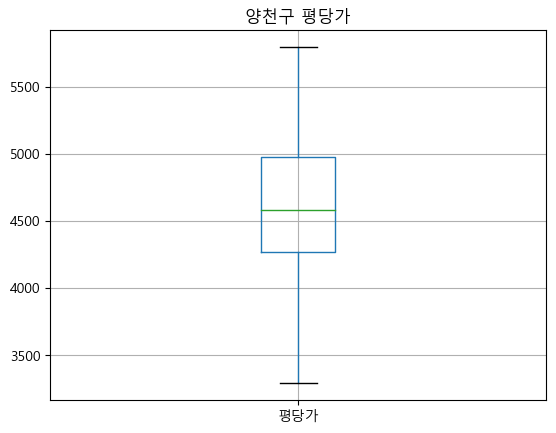

하위 25% :  4139.532257999999
상위 25% :  5329.409626
중구 평균 평당가:  4784.354894597015
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


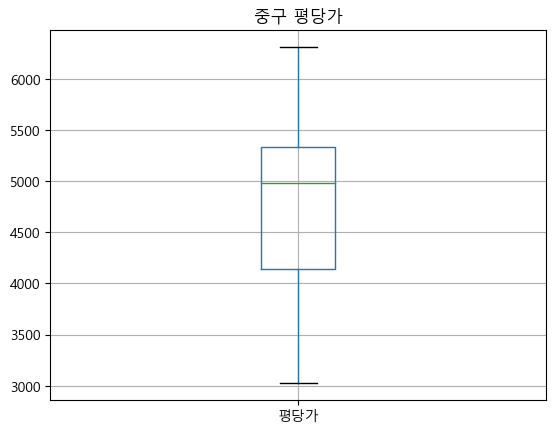

---------------------------------------
전체 시각화


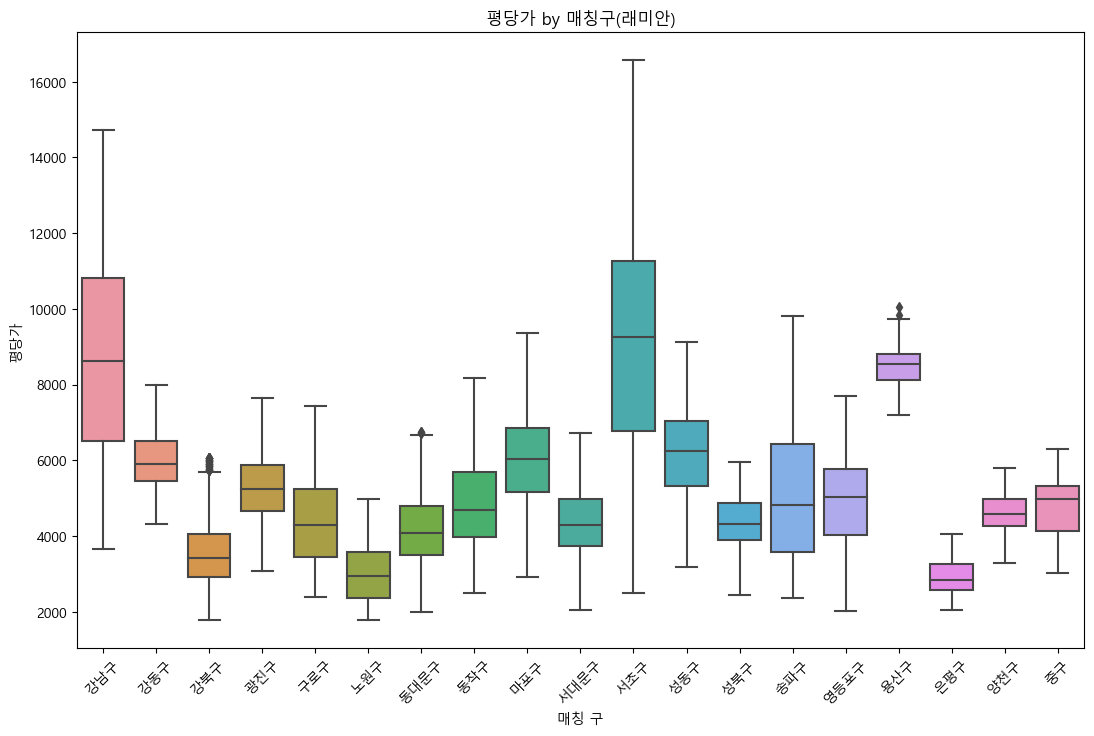

In [6]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



#데이터 문제 없이 이상치 제거

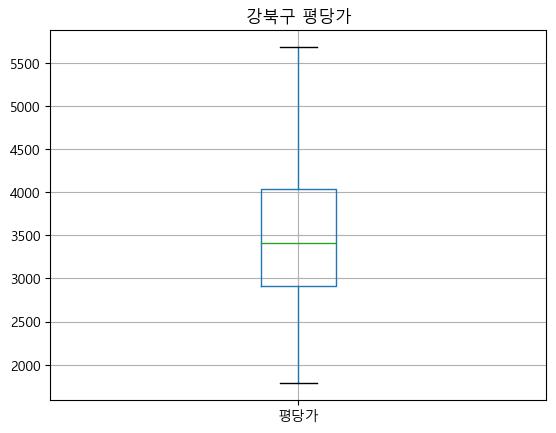

In [7]:

group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [8]:
data = filtered_data_total

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7778 non-null   int64  
 1   건축년도                                7778 non-null   int64  
 2   매칭 구                                7778 non-null   object 
 3   건설수주_건축(단위 백만원)                     7778 non-null   object 
 4   건설수주_주택(단위 백만원)                     7778 non-null   object 
 5   매매가격지수(아파트)                         7778 non-null   float64
 6   경상수지(백만불)                           7778 non-null   object 
 7   무역수지(백만불)                           7778 non-null   object 
 8   대출금액(아파트)(억원)                       7778 non-null   object 
 9   대출잔액(아파트)(억원)                       7778 non-null   object 
 10  서울_신규_분양세대(단위: 세대)                  7778 non-null   object 
 11  아파트 동(호)수_(단위: 호)                   7778 no

In [10]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [11]:
X.shape

NameError: name 'X' is not defined

In [95]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [96]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [97]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test:.2f}")

In [98]:
#모델 훈련
models = train_models(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 4602, number of used features: 4
[LightGBM] [Info] Start training from score 5414.010221


In [99]:
#모델의 훈련 및 검증과정 성능 지표 기록
def plot_training_history(models, X_train, y_train, X_val, y_val):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    fig.suptitle('Model Training and Validation Performance')

    for name, model in models.items():
        # 모델 학습
        model.fit(X_train, y_train)

        # 성능 지표 계산
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        val_mse = mean_squared_error(y_val, model.predict(X_val))
        train_r2 = r2_score(y_train, model.predict(X_train))
        val_r2 = r2_score(y_val, model.predict(X_val))

        # MSE 그래프
        axes[0].plot([1, 2], [train_mse, val_mse], marker='o', label=f'{name}')
        axes[0].set_xticks([1, 2])
        axes[0].set_xticklabels(['Train', 'Validation'])
        axes[0].set_title('Mean Squared Error (MSE)')
        axes[0].set_ylabel('MSE')
        axes[0].legend()

        # R² 그래프
        axes[1].plot([1, 2], [train_r2, val_r2], marker='o', label=f'{name}')
        axes[1].set_xticks([1, 2])
        axes[1].set_xticklabels(['Train', 'Validation'])
        axes[1].set_title('R² Score')
        axes[1].set_ylabel('R² Score')
        axes[1].legend()

    plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 4602, number of used features: 4
[LightGBM] [Info] Start training from score 5414.010221


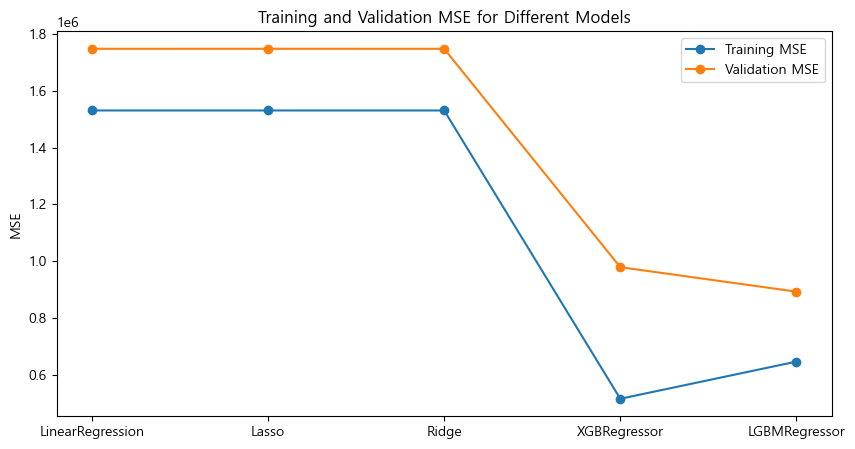

In [100]:
#결과 시각화
plot_mse_for_models_line(models, X_train, y_train, X_val, y_val)

In [101]:
#모델 test평가
evaluate_models_on_test(models, X_test, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	1686658.9724		0.69
Lasso            	1686675.2330		0.69
Ridge            	1686659.2122		0.69
XGBRegressor     	850075.6681		0.85
LGBMRegressor    	827048.5252		0.85


# xgboost early stop

[0]	validation_0-rmse:4157.64180	validation_1-rmse:4258.82040
[1]	validation_0-rmse:3003.86741	validation_1-rmse:3087.03126
[2]	validation_0-rmse:2219.03876	validation_1-rmse:2303.70789
[3]	validation_0-rmse:1691.48177	validation_1-rmse:1763.40543
[4]	validation_0-rmse:1347.23290	validation_1-rmse:1421.23217
[5]	validation_0-rmse:1130.87393	validation_1-rmse:1213.87636
[6]	validation_0-rmse:1003.09274	validation_1-rmse:1098.26303
[7]	validation_0-rmse:933.00800	validation_1-rmse:1033.85628
[8]	validation_0-rmse:888.08880	validation_1-rmse:996.43802
[9]	validation_0-rmse:862.67840	validation_1-rmse:978.30913
[10]	validation_0-rmse:842.81823	validation_1-rmse:963.13714
[11]	validation_0-rmse:833.16359	validation_1-rmse:953.82140
[12]	validation_0-rmse:824.75757	validation_1-rmse:949.11270
[13]	validation_0-rmse:818.84605	validation_1-rmse:950.69383
[14]	validation_0-rmse:814.79598	validation_1-rmse:951.30736
[15]	validation_0-rmse:807.66793	validation_1-rmse:947.76019
[16]	validation_0-r

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


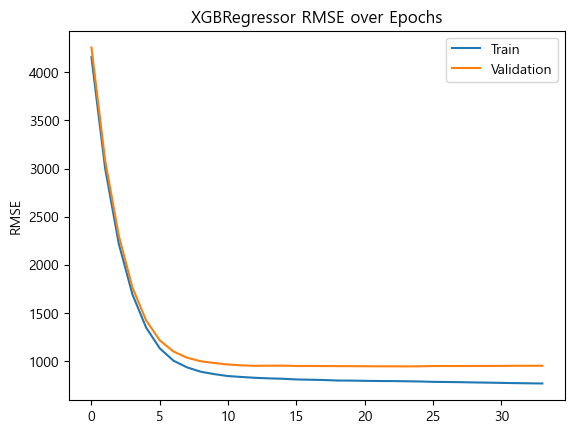

Xgboost Best Epoch:  23


In [102]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_val, y_val)]
reg_xgb.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행(EPOCH 23)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  809046.6913560497
XGBoost Test R² Score: 85.31%


# light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[51]	valid_0's rmse: 941.142	valid_0's l2: 885748


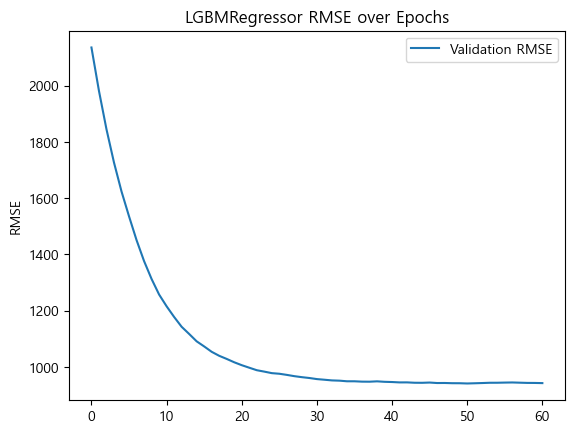

Best Iteration:  51


In [104]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


# LightGBM best_iteration으로 test 진행(EPOCH 51)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("Test MSE: ", mse_test)
print("Test R² Score: {:.2f}%".format(r2_test * 100))


Test MSE:  852035.1060764677
Test R² Score: 84.53%
